# MOWNIT
## Lab 4b
Jakub Karbowski

In [1]:
using Plots
using Interact
using DataFrames

WebIO._IJuliaInit()

In [2]:
function approxpoly(xs, ys, m)
    G = [ sum( @. xs ^ (i+j) )
          for i=0:m,
              j=0:m ]
    
    B = [ sum( @. ys * xs^i )
          for i=0:m ]
    
    A = G \ B
    
    function (x)
        sum([ A[j+1] * x^j
        for j=0:m ])
    end
end

scalex(x) = x/3 + pi

function approxtrig(xs, ys, m)
    n = length(xs)
    
    xs = scalex.(xs)
    
    a = [ 2/n * sum([ y * cos(k*x)
                for (x,y)=zip(xs,ys) ])
          for k=0:m ]
    b = [ 2/n * sum([ y * sin(k*x)
                for (x,y)=zip(xs,ys) ])
          for k=0:m ]
    
#     display(a)
#     display(b)
    
    function (x)
        x = scalex(x)
        a[1]/2 + sum([ a[k+1]*cos(k*x) + b[k+1]*sin(k*x)
                 for k=1:m ])
    end
end

approxtrig (generic function with 1 method)

In [3]:
sqerr(f, g, x) = sum( @. (f(x) - g(x))^2 )

sqerr (generic function with 1 method)

In [4]:
f(x) = exp(-2sin(x)) + 2cos(x)

xlo = -3pi
xhi = 3pi
xs = range(xlo, xhi, length=1000)

-9.42477796076938:0.018868424345884642:9.42477796076938

In [5]:
@manipulate for n=2:1000, m=0:20
    nodes = range(xlo, xhi, length=n)

    g1 = approxpoly(nodes, f.(nodes), m)
    g2 = approxtrig(nodes, f.(nodes), m)
    
    plot(
#         xs,
#         f.(xs),
#         label="f(x)",
        legend=:outerbottom,
#         line=:dash,
    )
    
    scatter!(
        nodes,
        f.(nodes),
        label="Nodes (n=$n)",
    )
    
    plot!(
        xs,
        g2.(xs),
        label="trig(x) (m=$m)",
    )
    
    plot!(
        xs,
        g1.(xs),
        label="poly(x) (m=$m)",
    )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 1000, :min => 2, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
501, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/carbon/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000016c4ca8c0, Task (runnable) @0x000000016c4ca8c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"

# Tabelki

In [6]:
function trialn(ns, m)
    dferr = DataFrame(n = [], ep = [], et = [])
    for n = ns
        nodes = range(xlo, xhi, length=n)

        p = approxpoly(nodes, f.(nodes), m)
        t = approxtrig(nodes, f.(nodes), m)
        ep = sqerr(f, p, xs)
        et = sqerr(f, t, xs)
        push!(dferr, (n, ep, et))
    end
    
    plt = plot(
        dferr[!, :n],
        [dferr[!, :ep],
        dferr[!, :et]],
        xlabel="n",
        ylabel="error",
        label=["poly" "trig"],
        title="m=$m",
    )
    
    dferr, plt
end

function trialm(n, ms)
    dferr = DataFrame(m = [], ep = [], et = [])
    for m = ms
        nodes = range(xlo, xhi, length=n)

        t = approxtrig(nodes, f.(nodes), m)
        p = approxpoly(nodes, f.(nodes), m)
        et = sqerr(f, t, xs)
        ep = sqerr(f, p, xs)
        push!(dferr, (m, ep, et))
    end

    plt = plot(
        dferr[!, :m],
        [dferr[!, :ep],
        dferr[!, :et]],
        xlabel="m",
        ylabel="error",
        label=["poly" "trig"],
        title="n=$n",
    )
    
    dferr, plt
end

function coolplot(ns, ms)
    plt = plot(
        xlabel="n",
        ylabel="error",
    )
    
    for m = ms
        dferr, _ = trialn(ns, m)
        plot!(plt,
            dferr[!, :n],
            dferr[!, :et],
            label="m=$m",
        )
    end
    
    plt
end

coolplot (generic function with 1 method)

# 1

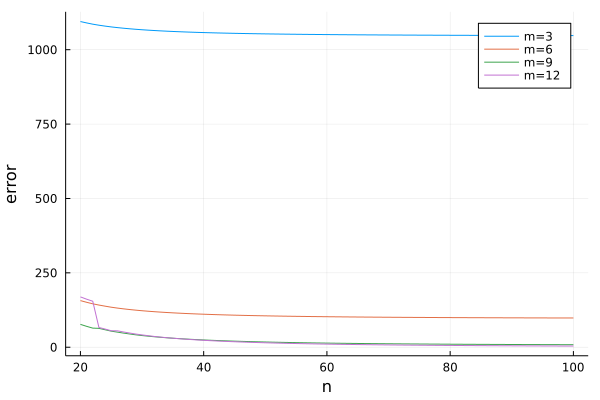

In [7]:
coolplot(20:100, 3:3:12)

# 2

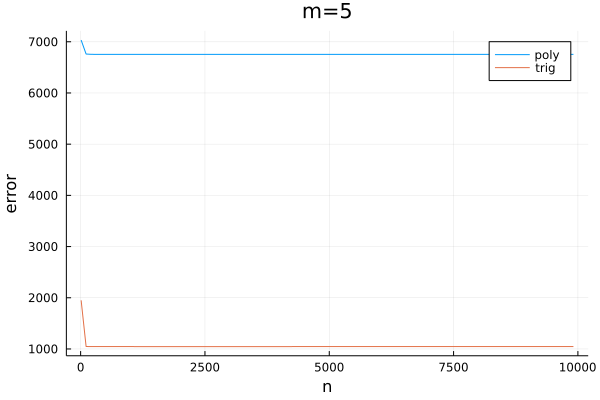

In [8]:
n = 10:100:10000
m = 5
trialn(n, m)[2]

In [9]:
n = 10:10:100
m = 5
trialn(n, m)[1]

,n,ep,et
,Any,Any,Any
1,10,7033.59,1950.0
2,20,6854.63,1104.58
3,30,6815.69,1071.37
4,40,6794.89,1059.98
5,50,6782.74,1054.74
6,60,6775.1,1051.92
7,70,6770.02,1050.22
8,80,6766.48,1049.13
9,90,6763.93,1048.39


# 3

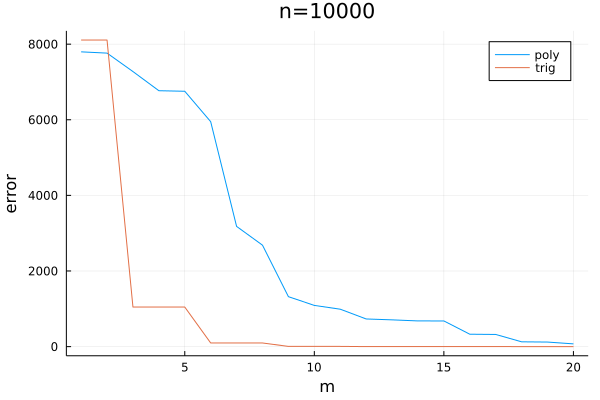

In [10]:
n = 10000
m = 1:1:20
trialm(n, m)[2]

In [11]:
n = 10000
m = 1:1:12
trialm(n, m)[1]

,m,ep,et
,Any,Any,Any
1,1,7796.52,8108.06
2,2,7762.93,8108.06
3,3,7274.56,1045.75
4,4,6768.27,1045.75
5,5,6753.77,1045.75
6,6,5949.73,95.7759
7,7,3179.21,95.776
8,8,2682.22,95.7761
9,9,1320.59,5.35006
